In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jedi

In [171]:
import os
file = 'KPMG_data_update_final.xlsx'


In [140]:
data = pd.ExcelFile('KPMG_data_update_final.xlsx')
sheet_names = data.sheet_names

## Customer Demographic Sheet

In [141]:
# loading first sheet - Customer demographics

customer_demo_df = pd.read_excel(file, header=1, sheet_name='CustomerDemographic')
customer_demo_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,67.282751,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16 00:00:00,40.085491,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20 00:00:00,67.008778,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03 00:00:00,59.301929,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13 00:00:00,43.682751,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [142]:
# dimension of data

customer_demo_df.shape

(4000, 13)

In [143]:
#checking for duplicated values

customer_demo_df[customer_demo_df.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
Age                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

*Assessing each coloumn for empty Values*

In [144]:
pd.isna(customer_demo_df).sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
Age                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [145]:
# Replacing missing last_names with 'n/a'

customer_demo_df['last_name'] = customer_demo_df['last_name'].fillna('n/a')

gender :  ['F' 'M' 'U']


(array([2039.,    0.,    0.,    0.,    0., 1873.,    0.,    0.,    0.,
          88.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

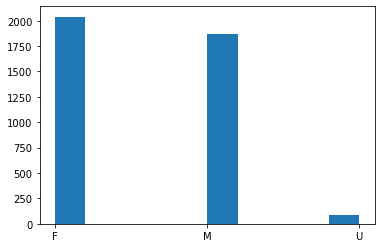

In [146]:
# Analyze gender values  

print('gender : ', customer_demo_df['gender'].unique())
plt.hist(customer_demo_df['gender'][pd.notna(customer_demo_df['gender'])])

In [147]:
# analysizing DOB

#reomving null / strin g/ float values 


i = 0

for d in customer_demo_df['DOB'] :
    
    if isinstance(d, datetime) == False :

           customer_demo_df = customer_demo_df.drop(index = i)            
    
    i = i + 1

print('DOB Blanks : ', pd.isna(customer_demo_df).sum()['DOB'])

DOB Blanks :  0


In [148]:
# brief statistical description 

customer_demo_df['DOB'].describe(datetime_is_numeric=True)

count                    3912
unique                   3447
top       1978-01-30 00:00:00
freq                        7
Name: DOB, dtype: object

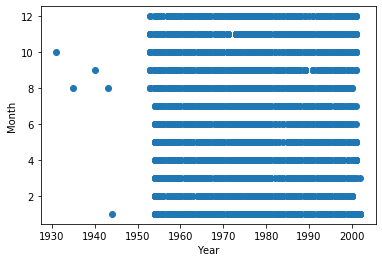

In [149]:
# plot a scatter graph of DOB

plt.scatter([d.year for d in customer_demo_df['DOB']], [d.month for d in customer_demo_df['DOB']])
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

count    3912.000000
mean       43.481470
std        12.626149
min        18.838915
25%        33.879326
50%        43.482751
75%        52.986861
max        89.269052
Name: Age, dtype: float64


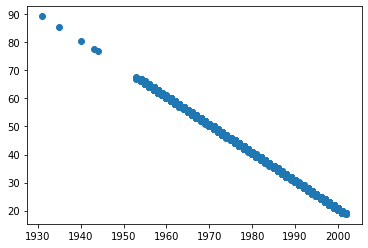

In [150]:
#To create age column
# from datetime import datetime
# cust_demo_df['age'] = (datetime.now() - cust_demo_df['DOB']) // 365

print(customer_demo_df['Age'].describe())

#Ploting Age column against DOB

plt.scatter([d.year for d in customer_demo_df['DOB']], customer_demo_df['Age']) 

In [151]:
# Assessing Job title 
print('job_title : ', customer_demo_df['job_title'].unique())  # printing unique values 

print('blanks:', pd.isna(customer_demo_df['job_title']).sum()) # number of blanks

job_title :  ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Operator' 'Web

In [152]:
# Replacing missing job_titles with 'n/a'

customer_demo_df['job_title'] = customer_demo_df['job_title'].fillna('n/a')

print('blanks:', pd.isna(customer_demo_df['job_title']).sum()) # number of blanks

blanks: 0


In [153]:
# Assessing Job Indutry 
print('job_industry_category : ', customer_demo_df['job_industry_category'].unique())  # printing unique values 

print('blanks:', pd.isna(customer_demo_df['job_industry_category']).sum()) # number of blanks

job_industry_category :  ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
blanks: 656


In [154]:
# Replacing missing job_industry_category with 'n/a'

customer_demo_df['job_industry_category'] = customer_demo_df['job_industry_category'].fillna('n/a')


print('blanks:', pd.isna(customer_demo_df['job_industry_category']).sum()) # number of blanks

blanks: 0


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([1954.,    0.,    0.,    0.,    0.,  962.,    0.,    0.,    0.,
         996.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

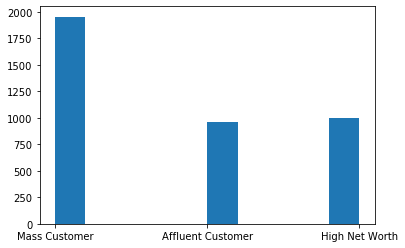

In [155]:
#Assessing Wealth Segment

print('wealth_segment:', customer_demo_df['wealth_segment'].unique())

print('blanks:', pd.isna(customer_demo_df['wealth_segment']).sum())

plt.hist(customer_demo_df['wealth_segment'][pd.notna(customer_demo_df['wealth_segment'])])

Deceased State: ['N' 'Y']
blanks: 0
Number of Deceased :  2


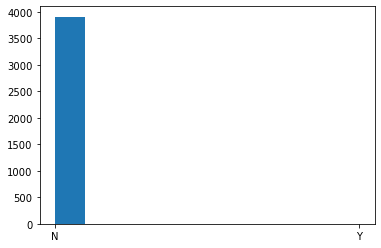

In [156]:
#Assessing Deceased

print('Deceased State:', customer_demo_df['deceased_indicator'].unique())

print('blanks:', pd.isna(customer_demo_df['deceased_indicator']).sum())

plt.hist(customer_demo_df['deceased_indicator'][pd.notna(customer_demo_df['deceased_indicator'])])

print( 'Number of Deceased : ' , customer_demo_df['deceased_indicator'][customer_demo_df['deceased_indicator'] == 'Y'].count() )

Car Owner : ['Yes' 'No']
blanks: 0


(array([1974.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1938.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

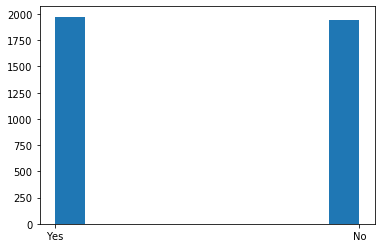

In [159]:
#Assess car ownership 

print('Car Owner :', customer_demo_df['owns_car'].unique())

print('blanks:', pd.isna(customer_demo_df['owns_car']).sum())
plt.hist(customer_demo_df['owns_car'][pd.notna(customer_demo_df['owns_car'])])

In [160]:
#Assessing Tenure

print('tenure blanks:', pd.isna(customer_demo_df['tenure']).sum())

tenure blanks: 0


In [189]:
# Description

print(customer_demo_df.describe())

       customer_id  past_3_years_bike_related_purchases          Age  \
count  3912.000000                          3912.000000  3912.000000   
mean   1999.828221                            49.039366    43.481470   
std    1154.903377                            28.768226    12.626149   
min       1.000000                             0.000000    18.838915   
25%    1002.750000                            24.000000    33.879326   
50%    2000.000000                            48.000000    43.482751   
75%    2997.250000                            73.000000    52.986861   
max    4000.000000                            99.000000    89.269052   

            tenure  
count  3912.000000  
mean     10.654652  
std       5.658898  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000  


In [167]:
# Blank values
print(pd.isna(customer_demo_df).sum())

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
Age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [168]:
# data

print(customer_demo_df)

      customer_id      first_name  last_name gender  \
0               1         Laraine  Medendorp      F   
1               2             Eli    Bockman      M   
2               3           Arlin     Dearle      M   
3               4          Talbot        n/a      M   
4               5  Sheila-kathryn     Calton      F   
...           ...             ...        ...    ...   
3994         3995           Rusty     Iapico      M   
3995         3996         Rosalia   Halgarth      F   
3996         3997          Blanch     Nisuis      F   
3998         3999       Patrizius        n/a      M   
3999         4000           Kippy    Oldland      M   

      past_3_years_bike_related_purchases                  DOB        Age  \
0                                      93  1953-10-12 00:00:00  67.282751   
1                                      81  1980-12-16 00:00:00  40.085491   
2                                      61  1954-01-20 00:00:00  67.008778   
3                              

## Customer Address Sheet

In [177]:
customer_addr_df = pd.read_excel(file, header=1, sheet_name='CustomerAddress')

customer_addr_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [176]:
#data dimension

customer_addr_df.shape

(3999, 6)

In [179]:
# Duplicated data

customer_addr_df[customer_addr_df.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [180]:
# Blank data

customer_addr_df[customer_addr_df.isna()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

*Assessing columns*

In [183]:
# Customer ID unique data

pd.notna(customer_addr_df['customer_id'].unique()).sum()

3999

In [193]:
#Find customer ID not in Demographics

sum = 0


for i in customer_addr_df['customer_id'] : 
    if i not in customer_demo_df['customer_id'] :
        sum = sum + 1
        

print('Customer ID not in demographics dataset:' , sum)


Customer ID not in demographics dataset: 92


state: ['NSW' 'QLD' 'VIC']


(array([2140.,    0.,    0.,    0.,    0.,  838.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

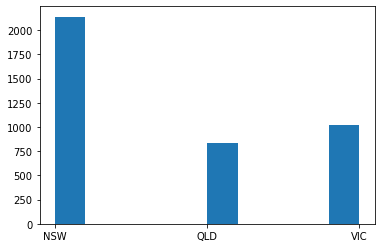

In [198]:
# Assessing States 

print('state:', customer_addr_df['state'].unique())
plt.hist(customer_addr_df['state'][pd.notna(customer_addr_df['state'])])

In [201]:
#Country 

print('country:', customer_addr_df['country'].unique())

country: ['Australia']


In [204]:
#Property Valuation 

customer_addr_df['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

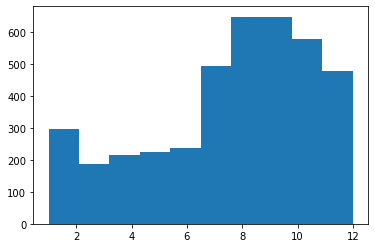

In [205]:
plt.hist(customer_addr_df['property_valuation'], bins=10)

## Transactions


In [206]:
transact_df = pd.read_excel(file, header=1, sheet_name='Transactions')
transact_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10 00:00:00,110.56
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19 00:00:00,751.02
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21 00:00:00,189.28
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09 00:00:00,90.10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09 00:00:00,17.87


In [207]:
transact_df.shape

(20000, 14)

In [210]:
#Empty Values

transact_df[transact_df.duplicated()].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
profit                     0.0
dtype: float64

In [211]:
# Empty Values 

transact_df[transact_df.isna()].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
profit                     0.0
dtype: float64

In [212]:
#List price summay

transact_df['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [215]:
# Standard Cost summay

transact_df['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [216]:
#Creating profits column

transact_df['profit'] = transact_df['list_price'] - transact_df['standard_cost']
transact_df['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

In [224]:
##print('customer_ids not in demographics dataset:', sum([( if (i not in customer_demo_df['customer_id']) else ) for i in customer_addr_df['customer_id']]))
#print('customer_ids not in addresses dataset:', sum([( if (i not in customer_demo_df['customer_id']) else ) for i in txnsomer_df['customer_id']]))


#Find customer ID not in Demographics

sum_1 = 0
sum_2 = 0

for i in transact_df['customer_id'] : 
    if i not in customer_demo_df['customer_id'] :
        sum_1 = sum_1 + 1
        

print('Customer ID not in demographics dataset:' , sum_1)

for i in transact_df['customer_id'] : 
    if i not in customer_addr_df['customer_id'] :
        sum_2 = sum_2 + 1
        

print('Customer ID not in demographics dataset:' , sum_2)

Customer ID not in demographics dataset: 460
Customer ID not in demographics dataset: 3


In [223]:
pd.notna(transact_df['customer_id'].unique()).sum()

3494

In [226]:
# transaction dates

transact_df['transaction_date'].describe(datetime_is_numeric=True)

count                            20000
mean     2017-07-01 14:08:05.279999744
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

online_order: [ 0.  1. nan]


(array([9811.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9829.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

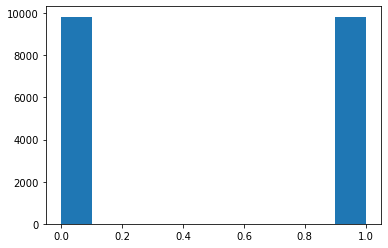

In [228]:
# Online order 

print('online_order:', transact_df['online_order'].unique())

plt.hist(transact_df['online_order'][pd.notna(transact_df['online_order'])])

order_status: ['Approved' 'Cancelled']


(array([19821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   179.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

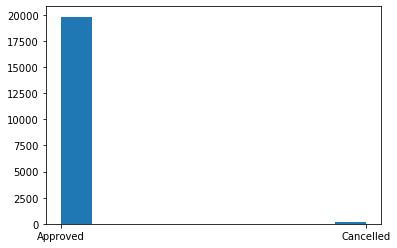

In [231]:
# Order status 

print('order_status:', transact_df['order_status'].unique())

plt.hist(transact_df['order_status'][pd.notna(transact_df['order_status'])])

In [232]:
#Number of cancelled orders 

transact_df['order_status'][transact_df['order_status'] == 'Cancelled'].count()

179

brand: ['OHM Cycles' 'Solex' 'Trek Bicycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]


(array([3043.,    0., 4253.,    0., 2990.,    0., 2910.,    0., 3312.,
        3295.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

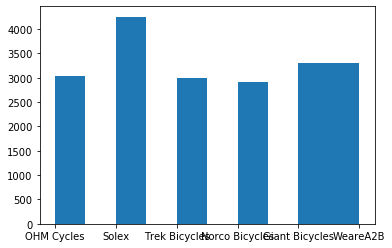

In [234]:
# Brands 

print('brand:', transact_df['brand'].unique())

plt.hist(transact_df['brand'][pd.notna(transact_df['brand'])])

product_class: ['medium' 'low' 'high' nan]


(array([13826.,     0.,     0.,     0.,     0.,  2964.,     0.,     0.,
            0.,  3013.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

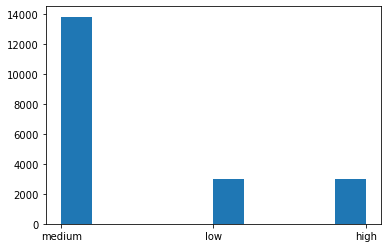

In [235]:
# Product class 

print('product_class:', transact_df['product_class'].unique())

plt.hist(transact_df['product_class'][pd.notna(transact_df['product_class'])])

product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]


(array([14176.,     0.,     0.,  3970.,     0.,     0.,   423.,     0.,
            0.,  1234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

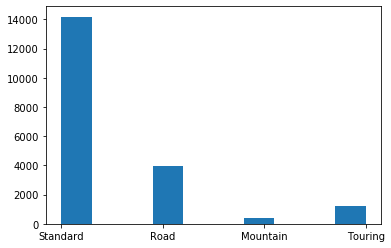

In [236]:
# Product line 

print('product_line:', transact_df['product_line'].unique())

plt.hist(transact_df['product_line'][pd.notna(transact_df['product_line'])])

product_size : ['medium' 'small' 'large' nan]


(array([12990.,     0.,     0.,     0.,     0.,  2837.,     0.,     0.,
            0.,  3976.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

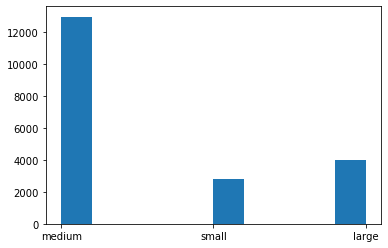

In [237]:
# Product Size 

print('product_size :', transact_df['product_size'].unique())

plt.hist(transact_df['product_size'][pd.notna(transact_df['product_size'])])

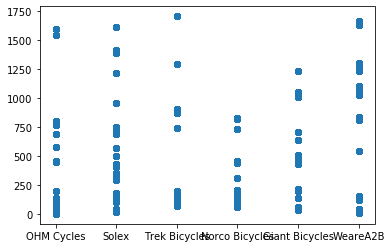

In [238]:
# Profits made by each brand 
plt.scatter(transact_df['brand'][pd.notna(transact_df['brand'])], transact_df['profit'][pd.notna(transact_df['brand'])])
